In [46]:
#goal: predict the number of people that died and survived in the test data using the training data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

testData = pd.read_csv("train.csv")
testData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
testData.drop(['Name','Ticket','Fare','Cabin'], axis=1, inplace = True)
print(tData)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0              1         0       3    male  22.0      1      0        S
1              2         1       1  female  38.0      1      0        C
2              3         1       3  female  26.0      0      0        S
3              4         1       1  female  35.0      1      0        S
4              5         0       3    male  35.0      0      0        S
5              6         0       3    male   NaN      0      0        Q
6              7         0       1    male  54.0      0      0        S
7              8         0       3    male   2.0      3      1        S
8              9         1       3  female  27.0      0      2        S
9             10         1       2  female  14.0      1      0        C
10            11         1       3  female   4.0      1      1        S
11            12         1       1  female  58.0      0      0        S
12            13         0       3    male  20.0      0      0  

In [48]:
testData.dropna(inplace = True)
print(testData)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0              1         0       3    male  22.0      1      0        S
1              2         1       1  female  38.0      1      0        C
2              3         1       3  female  26.0      0      0        S
3              4         1       1  female  35.0      1      0        S
4              5         0       3    male  35.0      0      0        S
6              7         0       1    male  54.0      0      0        S
7              8         0       3    male   2.0      3      1        S
8              9         1       3  female  27.0      0      2        S
9             10         1       2  female  14.0      1      0        C
10            11         1       3  female   4.0      1      1        S
11            12         1       1  female  58.0      0      0        S
12            13         0       3    male  20.0      0      0        S
13            14         0       3    male  39.0      1      5  

<IPython.core.display.Javascript object>


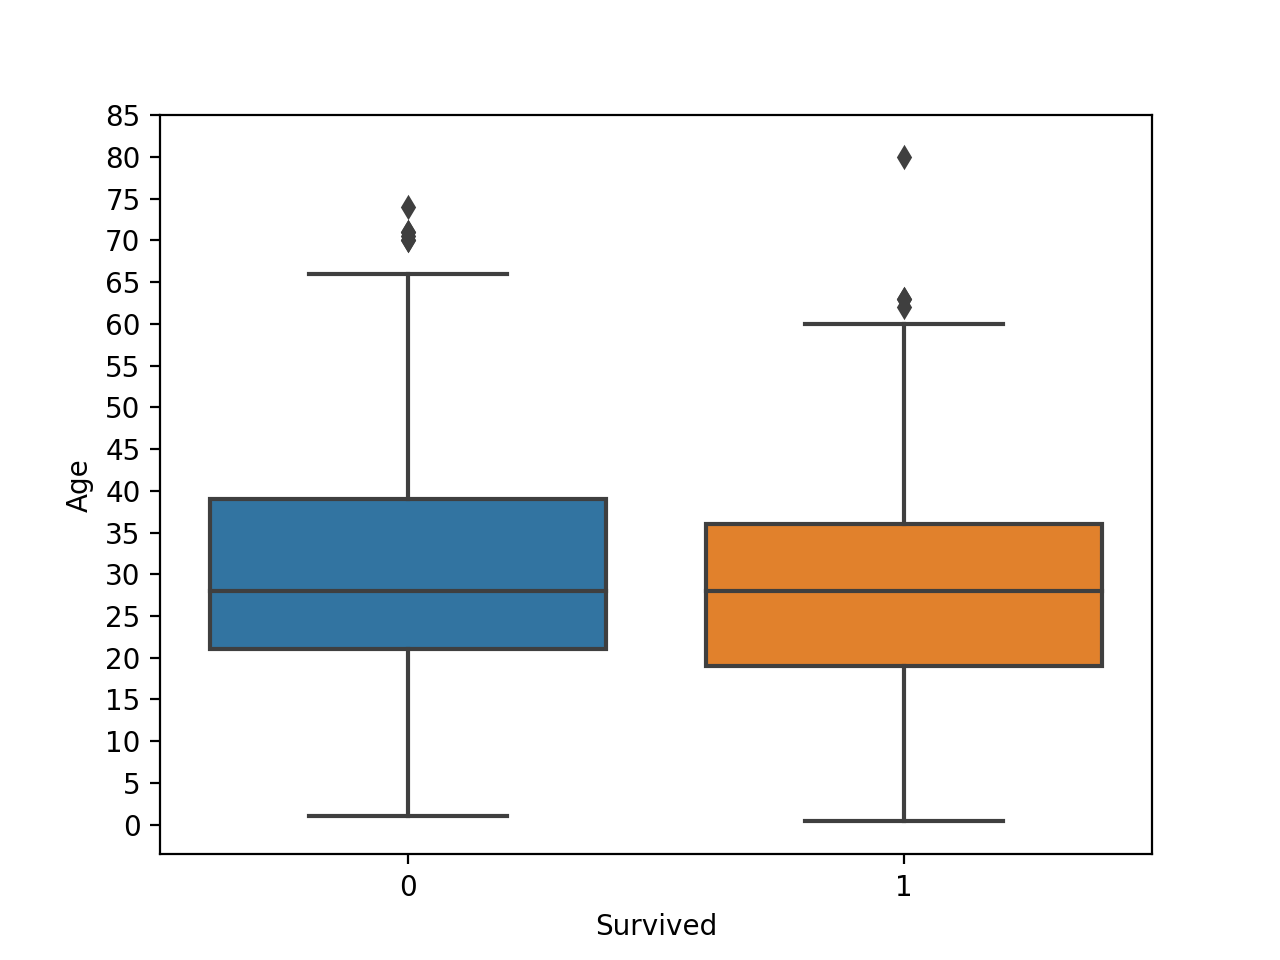

In [49]:
import seaborn as sns
sns.boxplot(x = 'Survived',y = 'Age', data = testData).set_yticks(range(0, 90, 5))

In [50]:
testData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000


<IPython.core.display.Javascript object>


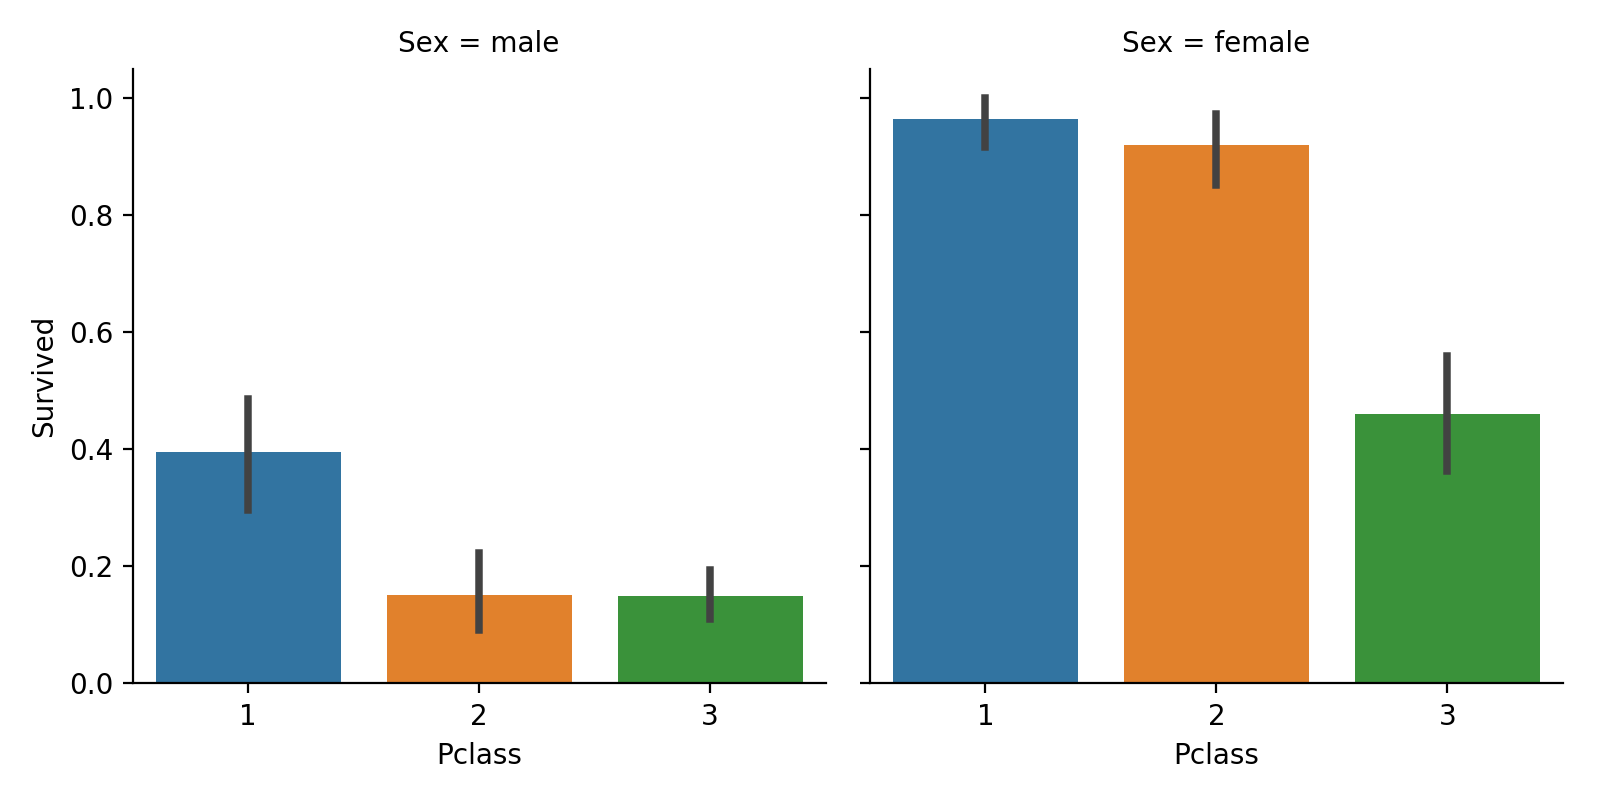

In [51]:
sns.factorplot(x = 'Pclass', y = 'Survived', data = testData, kind = 'bar', col = 'Sex')

In [52]:
from sklearn.neighbors import KNeighborsClassifier
#can try different amounts of k
knn = KNeighborsClassifier(n_neighbors=5)
testData.dropna(inplace = True)
a = np.array((testData['Sex'].replace({'male': 1, 'female': 0})))
b = np.array((testData['Age']))
c = np.array((testData['Pclass']))
d = np.array((testData['SibSp']))
e = np.array((testData['Parch']))
X_train = np.column_stack((a,b,c,d,e))
y_train = np.array(testData['Survived'])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
test = pd.read_csv('test.csv')
test.drop(['Name','Ticket','Fare','Cabin'], axis=1, inplace = True)
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
test = test.fillna(method = 'bfill', axis=0).fillna(0)
f = np.array((test['Sex'].replace({'male': 1, 'female': 0})))
g = np.array((test['Age']))
h = np.array((test['Pclass']))
i = np.array((test['SibSp']))
j = np.array((test['Parch']))
X_test = np.column_stack((f,g,h,i,j))
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
y_pred.shape

Test set predictions:
 [0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 0 1 1]


(418,)

In [54]:
test['Survived'] = y_pred
final = test[['PassengerId','Survived']]
print(final)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
5            897         1
6            898         0
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         1
14           906         0
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3

In [55]:
final.to_csv('TitanicSubmission1.csv', index = False)